<a target="_blank" href="https://colab.research.google.com/github/tatsath/Interpretability/blob/main/ActivationDetectTwoPass.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [2]:
!pip install nnsight sae-lens

  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.4
    Uninstalling numpy-2.2.4:
      Successfully uninstalled numpy-2.2.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.


In [3]:
!pip install --upgrade --force-reinstall numpy scipy scikit-learn

  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached scipy-1.15.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached scikit_learn-1.6.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
Using cached scipy-1.15.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (37.6 MB)
Using cached scikit_learn-1.6.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.5 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 3.6.0
    Uninstalling threadpoolctl-3.6.0:
      Successfully uni

In [4]:
!pip install neuronpedia

In [5]:
#!pip install --upgrade --force-reinstall numpy

In [6]:
# Import necessary libraries
from nnsight import LanguageModel
import torch
import pandas as pd

import huggingface_hub


# Initialize the language model with specific parameters
model = LanguageModel("google/gemma-2b-it", trust_remote_code=True, device_map="cuda:0", low_cpu_mem_usage=True, torch_dtype=torch.float16)
model.requires_grad_(False)



from sae_lens import SAE
layer = 6

# get the SAE for this layer
sae, cfg_dict, _ = SAE.from_pretrained(
    release = "gemma-2b-res-jb",
    sae_id = f"blocks.{layer}.hook_resid_post",
    device = 'cuda:0'
)
# Load the SAE weights using safetensors
# from safetensors import safe_open
# with safe_open("/home/ashater/work/sae.safetensors", framework="pt") as st:
#     w_dec = st.get_tensor("W_dec").to('cuda:1')





In [7]:

from huggingface_hub import hf_hub_download

# Define the repository ID and filename
repo_id = "jbloom/Gemma-2b-Residual-Stream-SAEs"
filename = "sae_weights.safetensors"

# Download the file


# filepath = hf_hub_download(repo_id=repo_id, filename=filename, subfolder="gemma_2b_blocks.6.hook_resid_post_16384")

#Layer 12
#filepath = hf_hub_download(repo_id=repo_id, filename=filename, subfolder="gemma_2b_blocks.12.hook_resid_post_16384")

# Layer 6
filepath = hf_hub_download(repo_id=repo_id, filename=filename, subfolder="gemma_2b_blocks.6.hook_resid_post_16384_anthropic_fast_lr")

# Print the downloaded file path
print(filepath)

# Print the downloaded file path
print(filepath)

/root/.cache/huggingface/hub/models--jbloom--Gemma-2b-Residual-Stream-SAEs/snapshots/2e64e9127f413318e0500a6ba3981483f251bcee/gemma_2b_blocks.6.hook_resid_post_16384_anthropic_fast_lr/sae_weights.safetensors
/root/.cache/huggingface/hub/models--jbloom--Gemma-2b-Residual-Stream-SAEs/snapshots/2e64e9127f413318e0500a6ba3981483f251bcee/gemma_2b_blocks.6.hook_resid_post_16384_anthropic_fast_lr/sae_weights.safetensors


In [8]:
# Load the SAE weights using safetensors
from safetensors import safe_open
with safe_open(filepath, framework="pt") as st:
    w_dec = st.get_tensor("W_dec").to('cuda:0')

In [9]:
import torch
#torch.cuda.is_available()

#torch.cuda.device_count()
#len(docs)
torch.cuda.set_device(0)
torch.cuda.current_device()


0

In [10]:
#sae.W_dec == w_dec

cos = torch.nn.CosineSimilarity(dim=1, eps=1e-6)
cos(w_dec[471,:], sae.W_dec).topk(100).indices

tensor([  471,  4579, 11129, 11728,  6446,  6510, 14611,  7687,  5411,   891,
        15780,  7372,   675, 13371,   713, 15976,  1076,  5419,   976, 13837,
        10036,  2817,  6495,   154,  2287, 15131, 16291,  3466,  2111, 14557,
         9715,  8481,  8099,  8567, 15023, 11584,  3869,  7062, 15369,  3864,
        14291,  5239,  7807,  4189,  4815, 13685, 10031,  2126,  5936, 14224,
        15698, 14444, 10105, 10185,  5407,  6545,  8586,  8753,  6027, 13939,
        11269,  9963,  8461, 15760,  2312,   544,  9188, 11808,  8498,   354,
         4989,  7682, 11355,  4828, 14022,  3586,  8306,   954, 12170,   167,
        11255,  9691,  6426, 11718, 14749,  7608, 14153,  3971, 14416, 13584,
         3900, 13970,  8222, 14874,  8523,  9004, 12520, 15384,  1805,   575],
       device='cuda:0')

Parameters

In [11]:
#@title Self-explanation in 18 lines
feature = 471  #@param {type: "integer"}
#feature = 5892  #@param {type: "integer"}
# feature = 9415
# feature = 3629
scale = 1 #@param {type: "number"}
se_demo = True  #@param {type: "boolean"}
max_new_tokens = 200  #@param {type: "integer"}
n_generate = 1  #@param {type: "integer"}
# vals = ['positive', 'neutral', 'negative']
# samples = pd.read_excel('/home/ashater/work/sae/sentence_sentiment_gpt4o.xlsx')

## Main code prompt


In [12]:
full_res = []

prompt = "Credit Risk related"
# prompt = """Credit Risk Related"""




with model.generate(prompt, max_new_tokens=max_new_tokens, num_return_sequences=n_generate, do_sample=True, scan=False, validate=False) as gen:
    # get final output saved
    out = model.generator.output.save()
    # capture at layer 6 or 12
    resid = model.model.layers[6].output.save()

features = sae.encode(resid[0])

summed_activations = features.abs().sum(dim=1) # Sort by max activations

print(summed_activations)
summed_activations = features
top_activations_indices = summed_activations.topk(1000) # Get indices of top 20
print(top_activations_indices)
#top_activations_indices = summed_activations.indices # Get indices of top 20


for i, l in enumerate(model.tokenizer.batch_decode(out)):
    #print(model.tokenizer.batch_decode(out))
    s = repr(l.partition(prompt)[2].partition("<eos>")[0])
    #print(prompt + "|"+ s + "|" + str(top_activations_indices))
    #print(prompt + "|"+ l +"\n" + "|" + str(top_activations_indices))
    #print(str(top_activations_indices))


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

tensor([[ 2.6458, 19.0831,  0.0000,  ...,  0.0000, 11.5059,  0.0000]],
       device='cuda:0', grad_fn=<SumBackward1>)
torch.return_types.topk(
values=tensor([[[51.1168, 48.4639, 45.8360,  ..., 18.9703, 18.9648, 18.9466],
         [13.9223,  3.4922,  2.9306,  ...,  0.0000,  0.0000,  0.0000],
         [12.2706,  5.2049,  2.2141,  ...,  0.0000,  0.0000,  0.0000],
         [11.3995,  4.3096,  2.9391,  ...,  0.0000,  0.0000,  0.0000]]],
       device='cuda:0', grad_fn=<TopkBackward0>),
indices=tensor([[[ 3390, 15881,  5347,  ...,  8207,    15,  3380],
         [ 5419, 10035,   471,  ...,   769,   770,   771],
         [10870,   471, 12704,  ...,   899,   900,   901],
         [15570,  4633, 11912,  ...,   889,   890,   891]]], device='cuda:0'))


https://www.neuronpedia.org/gemma-2b/6-res-jb/471


## summed activations across tokens, finance features

In [13]:
s

"' to the valuation of mortgage-backed securities (MBSs)\\n\\n**Credit Risk:**\\n\\nCredit risk is the risk that a borrower will not make their loan payment. This could be caused by a variety of factors, including job loss, financial distress, or bankruptcy.\\n\\n**Mortgage-Backed Securities (MBSs):**\\n\\nMBSs are loans that are typically issued by banks and other financial institutions to investors. MBSs are typically structured in a way that makes them highly creditworthy. This means that the lender has a risk-sharing agreement in place with the investors, which means that the lender will loss money if the MBS fails to make its payments.\\n\\n**Credit Risk and MBSs:**\\n\\nThe credit risk faced by investors in MBSs can vary depending on the type of MBSs being purchased. However, in general, it is considered to be high. This is because MBSs are often issued by financial institutions that have a history of poor creditworthiness. Additionally, MBSs are often'"

In [14]:
 #model.tokenizer.decode(model.tokenizer.encode(prompt)[2])
summed_activations[0][0]


tensor([ 2.6458, 19.0831,  0.0000,  ...,  0.0000, 11.5059,  0.0000],
       device='cuda:0', grad_fn=<SelectBackward0>)

In [15]:
#summed_activations[summed_activations > 10].shape
idc = summed_activations.topk(1000).indices
[g in idc for g in [354, 2105, 4218, 5239, 6545, 7529, 8461, 11614, 11916, 14291, 15399]]

[True, False, False, False, False, False, True, False, False, False, False]

In [16]:
#summed_activations[summed_activations > 10].shape
idc = summed_activations.topk(1139).indices
[g in idc for g in [10870]]

[True]

## Get features for each token

In [17]:
idc = summed_activations.mean(dim=1).topk(5000).indices
[g in idc for g in [354, 2105, 4218, 5239, 6545, 7529, 8461, 11614, 11916, 14291, 15399]]

[False, False, False, False, True, False, False, True, False, False, True]

In [18]:
prompt = "Credit Risk"
# prompt = """Credit Risk Related"""



#prompt = '<start_of_turn>user\nWhat is the meaning of the word "X"?<end_of_turn>\n<start_of_turn>model\nThe meaning of the word "X" is "'

# prompt = '<start_of_turn>user\n' + ismpl +  '<end_of_turn>\n<start_of_turn>model X'
# positions = [i for i, a in enumerate(model.tokenizer.encode(prompt)) if model.tokenizer.decode([a]) == "X"]
# print(positions)
#with model.generate(prompt, max_new_tokens=max_new_tokens, num_return_sequences=n_generate, do_sample=False, scan=False, validate=False, temperature=0.0) as gen:
with model.generate(s, max_new_tokens=max_new_tokens, num_return_sequences=n_generate, do_sample=True, scan=False, validate=False) as gen:
    # vector steering section
    # for feature_i in topics:
    # vector = sae.W_dec[[feature]]
    # vector = vector / vector.norm()
    # vector = vector * scale
    # setting vector into layer 2
    # for position in positions:
    #   model.model.layers[2].output[0][:, position] = vector

    # get final output saved
    out = model.generator.output.save()
    # capture at layer 6 or 12
    resid = model.model.layers[6].output.save()

features = sae.encode(resid[0])

summed_activations = features.abs().sum(dim=1) # Sort by max activations

print(summed_activations)
summed_activations = features
top_activations_indices = summed_activations.topk(1000) # Get indices of top 20
print(top_activations_indices)
#top_activations_indices = summed_activations.indices # Get indices of top 20


for i, l in enumerate(model.tokenizer.batch_decode(out)):
    #print(model.tokenizer.batch_decode(out))
    s = repr(l.partition(prompt)[2].partition("<eos>")[0])
    #print(prompt + "|"+ s + "|" + str(top_activations_indices))
    #print(prompt + "|"+ l +"\n" + "|" + str(top_activations_indices))
    #print(str(top_activations_indices))

tensor([[ 2.6473, 19.0836,  0.0489,  ...,  0.0000, 11.7467,  0.0924]],
       device='cuda:0', grad_fn=<SumBackward1>)
torch.return_types.topk(
values=tensor([[[51.1153, 48.4625, 45.8345,  ..., 18.9746, 18.9655, 18.9496],
         [ 3.5485,  2.1739,  1.7919,  ...,  0.0000,  0.0000,  0.0000],
         [ 4.0525,  3.5531,  3.3943,  ...,  0.0000,  0.0000,  0.0000],
         ...,
         [ 3.4990,  2.5071,  1.7149,  ...,  0.0000,  0.0000,  0.0000],
         [ 7.6953,  3.4169,  1.7606,  ...,  0.0000,  0.0000,  0.0000],
         [ 3.6845,  2.7778,  1.0392,  ...,  0.0000,  0.0000,  0.0000]]],
       device='cuda:0', grad_fn=<TopkBackward0>),
indices=tensor([[[ 3390, 15881,  5347,  ...,  8207,    15,  3380],
         [ 1590,  3586, 11912,  ...,   845,   846,   847],
         [ 1590, 13820,  3558,  ...,   836,   837,   838],
         ...,
         [ 9177,  7394, 14890,  ...,   975,   976,   977],
         [14334, 10852, 14755,  ...,   962,   963,   964],
         [ 1590,  8691,  4046,  ...,   9

In [19]:
summed_activations.mean(dim=1).topk(100)

torch.return_types.topk(
values=tensor([[1.8115, 1.0143, 0.7915, 0.5611, 0.5562, 0.5547, 0.5231, 0.4978, 0.4664,
         0.4497, 0.3543, 0.3477, 0.3346, 0.3226, 0.3149, 0.2625, 0.2502, 0.2436,
         0.2421, 0.2414, 0.2358, 0.2281, 0.2236, 0.2212, 0.2185, 0.2177, 0.2173,
         0.2165, 0.2139, 0.2128, 0.2119, 0.2118, 0.2085, 0.2082, 0.2072, 0.2044,
         0.2032, 0.2026, 0.2018, 0.2013, 0.1982, 0.1936, 0.1895, 0.1865, 0.1863,
         0.1861, 0.1859, 0.1857, 0.1849, 0.1845, 0.1827, 0.1826, 0.1825, 0.1820,
         0.1810, 0.1809, 0.1801, 0.1799, 0.1794, 0.1790, 0.1776, 0.1770, 0.1761,
         0.1757, 0.1753, 0.1743, 0.1741, 0.1737, 0.1727, 0.1724, 0.1705, 0.1699,
         0.1697, 0.1694, 0.1693, 0.1691, 0.1685, 0.1679, 0.1674, 0.1668, 0.1667,
         0.1666, 0.1658, 0.1658, 0.1646, 0.1634, 0.1633, 0.1632, 0.1632, 0.1632,
         0.1628, 0.1626, 0.1626, 0.1624, 0.1624, 0.1624, 0.1622, 0.1620, 0.1615,
         0.1613]], device='cuda:0', grad_fn=<TopkBackward0>),
indices=tensor(

In [20]:
summed_activations.sum(dim=1).topk(100)

torch.return_types.topk(
values=tensor([[394.9175, 221.1166, 172.5437, 122.3183, 121.2552, 120.9322, 114.0346,
         108.5280, 101.6662,  98.0339,  77.2270,  75.7998,  72.9328,  70.3268,
          68.6437,  57.2215,  54.5356,  53.0957,  52.7726,  52.6264,  51.4087,
          49.7275,  48.7440,  48.2237,  47.6293,  47.4585,  47.3739,  47.2016,
          46.6329,  46.3938,  46.1964,  46.1800,  45.4471,  45.3972,  45.1657,
          44.5699,  44.2888,  44.1567,  43.9837,  43.8839,  43.1978,  42.1986,
          41.3195,  40.6557,  40.6124,  40.5596,  40.5167,  40.4780,  40.3179,
          40.2268,  39.8200,  39.8122,  39.7839,  39.6830,  39.4574,  39.4398,
          39.2601,  39.2231,  39.1098,  39.0281,  38.7072,  38.5843,  38.3958,
          38.2937,  38.2253,  37.9934,  37.9504,  37.8704,  37.6570,  37.5921,
          37.1695,  37.0300,  36.9879,  36.9250,  36.9109,  36.8673,  36.7361,
          36.6008,  36.5002,  36.3577,  36.3361,  36.3260,  36.1538,  36.1383,
          35.8881,  

In [21]:
import pandas as pd
import torch

def get_top_activations(model, sae, prompt, max_new_tokens=200, n_generate=1, top_n=2):
  """
  Returns the top n activations in a Pandas DataFrame for both the prompt and the output.

  Args:
    model: The language model object.
    sae: The SAE object.
    prompt: The input prompt.
    max_new_tokens: The maximum number of new tokens to generate for the output.
    n_generate: The number of output sequences to generate.
    top_n: The number of top activations to return.

  Returns:
    A tuple containing two Pandas DataFrames: one for the prompt and one for the output.
  """

  # # Get activations for the prompt
  # with model.generate(prompt, max_new_tokens=max_new_tokens, num_return_sequences=n_generate, do_sample=True, scan=False, validate=False) as gen:
  #     # get final output saved
  #     out = model.generator.output.save()
  #     # capture at layer 6 or 12
  #     resid = model.model.layers[6].output.save()

  # prompt_features = sae.encode(resid[0])

  # prompt_summed_activations = features.abs().sum(dim=1) # Sort by max activations

  # print(summed_activations)
  # summed_activations = features
  # top_activations_indices = summed_activations.topk(1000) # Get indices of top 20



  with model.generate(prompt, max_new_tokens=max_new_tokens, num_return_sequences=n_generate, do_sample=True, scan=False, validate=False) as gen:
      # get final output saved
      out = model.generator.output.save()
      # capture at layer 6 or 12
      resid = model.model.layers[6].output.save()

  prompt_features = sae.encode(resid[0][:, 1:]) # exclude <bos> token
  #print(prompt_features.topk(top_n+1))
  prompt_summed_activations_topk  = prompt_features.abs().sum(dim=1).topk(top_n) # Sort by max activations
  prompt_mean_activations_topk  = prompt_features.abs().mean(dim=1).topk(top_n) # Sort by max activations
  #print(prompt_summed_activations_topk)
  #print(prompt_mean_activations_topk )



  for i, l in enumerate(model.tokenizer.batch_decode(out)):
      s = repr(l.partition(prompt)[2].partition("<eos>")[0])


  # Get activations for the output
  with model.generate(s, max_new_tokens=max_new_tokens, num_return_sequences=n_generate, do_sample=True, scan=False, validate=False) as gen:
      # out = model.generator.output.save()
      resid = model.model.layers[6].output.save()  # Capture at layer 6

  output_features = sae.encode(resid[0][:, 1:])
  output_summed_activations_topk = output_features.abs().sum(dim=1).topk(top_n) # Sort by max activations
  output_mean_activations_topk  = output_features.abs().mean(dim=1).topk(top_n) # Sort by max activations
  #print(output_summed_activations_topk)
  #print(output_mean_activations_topk )

  # Create prompt_df
  prompt_df = pd.DataFrame({
      "feature": prompt_summed_activations_topk.indices[0].cpu().detach().numpy(),
      "sum_activation": prompt_summed_activations_topk.values[0].cpu().detach().numpy(),
      "mean_activation": prompt_mean_activations_topk.values[0].cpu().detach().numpy()
  })

  # Create output_df
  output_df = pd.DataFrame({
      "feature": output_summed_activations_topk.indices[0].cpu().detach().numpy(), # Added .detach()
      "sum_activation": output_summed_activations_topk.values[0].cpu().detach().numpy(), # Added .detach()
      "mean_activation": output_mean_activations_topk.values[0].cpu().detach().numpy() # Added .detach()
  })

  output = s

  return prompt_df, output_df, output

In [22]:
# Get the top 100 activations for both prompt and output

prompt = 'credit Risk related'
prompt_df, output_df, output = get_top_activations(model, sae, prompt, top_n=2)

# Display the DataFrames
print("Prompt activations:")
display(prompt_df)

print("\nOutput activations:")
display(output_df)

Prompt activations:


,feature,sum_activation,mean_activation
0,5419,15.582191,5.194064
1,10870,12.870153,4.290051



Output activations:


,feature,sum_activation,mean_activation
0,3553,262.178467,1.144884
1,12704,154.557022,0.674922


Bias Use case

In [23]:
# Get the top 100 activations for both prompt and output

prompt = "Goldman Sachs price goes up"
#prompt = "Credit Risk related"
prompt_df, output_df, output = get_top_activations(model, sae, prompt, top_n=5)

# Display the DataFrames
print("Prompt activations:")
display(prompt_df)

print("\nOutput activations:")
display(output_df)

Prompt activations:


,feature,sum_activation,mean_activation
0,11733,21.400154,3.566692
1,11912,16.695982,2.782664
2,2724,11.473870,1.912312
3,9468,10.923613,1.820602
4,15354,9.422899,1.570483



Output activations:


,feature,sum_activation,mean_activation
0,13603,18.660759,0.888608
1,637,17.171717,0.817701
2,4801,15.259472,0.726642
3,11912,14.098722,0.671368
4,3553,13.199612,0.628553


## Autointerp from Neuronpedia

In [24]:
import requests
import json
from google.colab import userdata

def get_or_generate_activation_description(modelId, layer, index, apiKey):
    """Retrieves or generates an activation description.

    Args:
        modelId: The model ID.
        layer: The layer number.
        index: The neuron index.
        apiKey: Your Neuronpedia API key.

    Returns:
        The activation description, or None if not found.
    """

    # Try to retrieve the description
    retrieve_url = f"https://neuronpedia.org/api/feature/{modelId}/{layer}/{index}"
    retrieve_response = requests.get(retrieve_url)
    retrieve_data = retrieve_response.json()
    description = find_description(retrieve_data)  # Assuming find_description is defined

    # If description is not found, generate it
    #print(description)
    if description is None:
        generate_url = "https://www.neuronpedia.org/api/explanation/generate"
        payload = {
            "modelId": modelId,
            "layer": layer,
            "index": index,
            "explanationType": "oai_attention-head",
            "explanationModelName": "gpt-4o"
        }
        headers = {
            "Content-Type": "application/json",
            "x-api-key": apiKey
        }
        generate_response = requests.post(generate_url, json=payload, headers=headers)
        generate_data = generate_response.json()
        #print(generate_data)
        description = generate_data.get('explanation', {}).get('description', None)

    return description

def find_description(data):
    if 'explanations' in data:
        for item in data['explanations']:
            return item['description']
    # recursively check nested dictionaries
    for key, value in data.items():
        if isinstance(value, dict):
            result = find_description(value)
            if result:
                return result
        elif isinstance(value, list):
            for element in value:
                if isinstance(element, dict):
                    result = find_description(element)
                    if result:
                        return result
    return None


# Example usage:
apiKey = userdata.get('NEURONPEDIA_API_KEY')  # Replace with your actual API key
description = get_or_generate_activation_description("gemma-2b", "6-res-jb", "10006", apiKey)
print("Description:", description)

Description: words related to specific fruits, especially cherry


In [25]:
# ... (your previous code to define get_or_generate_activation_description and find_description) ...

# Assuming you have output_df and prompt_df DataFrames

# API key, modelId, and layer (replace with your actual values)

apiKey = userdata.get('NEURONPEDIA_API_KEY')
modelId = "gemma-2b"
layer = "6-res-jb"

# Function to get feature label (same as before)
def get_feature_label(row):
    #print(int(row['feature']))
    feature_index = int(row['feature'])
    description = get_or_generate_activation_description(modelId, layer, feature_index, apiKey)
    return description

# Apply to output_df
output_df['feature_label'] = output_df.apply(get_feature_label, axis=1)

# Apply to prompt_df
prompt_df['feature_label'] = prompt_df.apply(get_feature_label, axis=1)

# Display the DataFrames
print("Prompt activations:")
display(prompt_df)

print("\nOutput activations:")
display(output_df)

Prompt activations:


,feature,sum_activation,mean_activation,feature_label
0,11733,21.400154,3.566692,references to gold mining and related activities
1,11912,16.695982,2.782664,"text mentioning technical details and updates,..."
2,2724,11.473870,1.912312,references to prices or pricing information
3,9468,10.923613,1.820602,mentions of movement or travel
4,15354,9.422899,1.570483,terms related to financial news and companies



Output activations:


,feature,sum_activation,mean_activation,feature_label
0,13603,18.660759,0.888608,keywords related to job markets and economic a...
1,637,17.171717,0.817701,questions and requests about specific topics o...
2,4801,15.259472,0.726642,economic terms and information
3,11912,14.098722,0.671368,"text mentioning technical details and updates,..."
4,3553,13.199612,0.628553,names of places or locations.


In [26]:
def add_label(prompt_df, output_df, apiKey, modelId, layer):
    """Applies feature labels, styles, and displays the dataframes."""

    def get_feature_label(row):
        feature_index = int(row['feature'])
        description = get_or_generate_activation_description(modelId, layer, feature_index, apiKey)
        return description

    # Apply to output_df
    output_df['feature_label'] = output_df.apply(get_feature_label, axis=1)

    # Apply to prompt_df
    prompt_df['feature_label'] = prompt_df.apply(get_feature_label, axis=1)

    return prompt_df, output_df

## Hallucination detection


In [27]:
prompt = "Goldman Sachs price goes up"
apiKey = userdata.get('NEURONPEDIA_API_KEY')
modelId = "gemma-2b"
layer = "6-res-jb"
top_n = 20
prompt_df, output_df, output = get_top_activations(model, sae, prompt, top_n=top_n)
prompt_df_updated, output_df_updated = add_label(prompt_df, output_df, apiKey, modelId, layer)


In [28]:
# Display the DataFrames
pd.set_option('display.max_colwidth', None)
print("Prompt activations:")
display(prompt_df_updated)

# print("\nOutput activations:")
# display(output_df_updated)

#print(output)

Prompt activations:


,feature,sum_activation,mean_activation,feature_label
0,11733,21.400154,3.566692,references to gold mining and related activities
1,11912,16.695982,2.782664,"text mentioning technical details and updates, including dates, times, and versions"
2,2724,11.473870,1.912312,references to prices or pricing information
3,9468,10.923613,1.820602,mentions of movement or travel
4,15354,9.422899,1.570483,terms related to financial news and companies
5,10780,9.057245,1.509541,company names or technical terms
6,8461,9.049295,1.508216,"financial market information, including company ratings, stock prices, and analyst opinions"
7,12704,8.850270,1.475045,content related to credit unions and financial services
8,9562,7.014214,1.169036,"names of specific individuals or professionals in the fields of teaching, Constitutional law, and medical advocacy"
9,3553,6.765824,1.127637,names of places or locations.


In [29]:
def get_feature_sum(output_df, feature_list):
    """
    Get the sum of activations for the provided list of features.
    If a feature doesn't exist, it's skipped.
    """
    total_sum = 0
    for feature in feature_list:
        # Check if the feature exists in the dataframe
        if feature in output_df['feature'].values:
            total_sum += output_df[output_df['feature'] == feature]['sum_activation'].values[0]
    return total_sum

def rag_function(model, prompt):
    """
    Adds an additional prompt for fact-checking and generates the final result using the model.
    """
    # Define the additional fact-checking prompt
    fact_checking_prompt = f"Fact-check the following and provide a detailed and accurate response: {prompt}"

    # Generate the output with the fact-checking prompt
    with model.generate(fact_checking_prompt, max_new_tokens=500, num_return_sequences=1, do_sample=True, scan=False, validate=False) as gen:
        out = model.generator.output.save()
        # Capture at layer 6 or 12
        resid = model.model.layers[6].output.save()

    # Decode the generated output
    final_output = model.tokenizer.batch_decode(out)
    print(f"Final Output with Fact-Checking: {final_output[0]}")
    return final_output[0]

In [30]:
import torch

def check_activation_and_rag(model, sae, prompt, output_df, feature_list, top_n=10, threshold=0.2):
    """
    Checks activations for a list of features and if their sum is less than a threshold,
    invokes the RAG function to fact-check the output and generate the final result.
    """

    # Get top activations
    prompt_df, output_df, output = get_top_activations(model, sae, prompt, top_n=top_n)
    #print(output_df)

    # Get the sum of activations for the provided features
    activation_sum = get_feature_sum(output_df, feature_list)

    # Calculate total sum of activations
    total_activation = output_df['sum_activation'].sum()

    # Calculate percentage of the sum of activations for the specified features compared to the total
    activation_percentage = activation_sum / total_activation

    if activation_percentage < threshold:
        print(f"Activation is below threshold ({activation_percentage*100}%). Triggering RAG.")
        return rag_function(model, prompt)
    else:
        print(f"Activation is above threshold ({activation_percentage*100}%). Proceeding with the output.")
        return output




In [31]:
# Define the features you want to check (e.g., 15857 and 15354)
features_to_check = [15857, 15354]

prompt = "What are different products in financial markets ?"

# Call the function with the provided features
output = check_activation_and_rag(model, sae, prompt, output_df, features_to_check, top_n=20, threshold=0.2)

# Proceed with the output after fact-checking if required
print(output)


Activation is below threshold (2.218313217163086%). Triggering RAG.
Final Output with Fact-Checking: <bos>Fact-check the following and provide a detailed and accurate response: What are different products in financial markets ?

Financial markets are complex ecosystems where various products are traded to facilitate the distribution of financial resources and services. Here's a breakdown of the different types of products found in financial markets:

1. Stocks: Stocks are ownership shares of a company that issue them. They represent a claim on the company's future earnings and assets. Investors purchase stocks with the intention of reselling them in the future at a higher price, with the hope of generating profit.

2. Bonds: Bonds are loans that companies or governments make to investors in exchange for a periodic interest payment and the repayment of the principal amount at maturity. Investors purchase bonds to secure a return on their investment.

3. Derivatives: Derivatives are fina

## BIAS DETECTION

In [32]:
import pandas as pd

def get_top_activated_features_with_labels(model, sae, prompts, top_n=10):
    """
    Sends each prompt one by one to the top activation function,
    sums the activations of all features across all outputs,
    and returns the final top activated features along with their labels.
    """

    # Initialize an empty dictionary to sum feature activations and store labels
    feature_activation_sum = {}
    feature_label_map = {}

    for prompt in prompts:
        # Get top activations for the current prompt
        prompt_df, output_df, output = get_top_activations(model, sae, prompt, top_n=top_n)

        # Add feature labels to output DataFrame
        prompt_df_updated, output_df_updated = add_label(prompt_df, output_df, apiKey, modelId, layer)

        # Sum the activations across all prompts
        for _, row in prompt_df.iterrows():
            feature = row['feature']
            activation = row['sum_activation']
            label = row['feature_label']

            # Sum activations for each feature
            if feature in feature_activation_sum:
                feature_activation_sum[feature] += activation
            else:
                feature_activation_sum[feature] = activation
                feature_label_map[feature] = label  # Store the label for the feature

    # Convert to DataFrame and sort by activation sum
    final_feature_df = pd.DataFrame({
        'feature': feature_activation_sum.keys(),
        'total_activation': feature_activation_sum.values(),
        'feature_label': [feature_label_map[f] for f in feature_activation_sum.keys()]
    })
    final_feature_df = final_feature_df.sort_values(by='total_activation', ascending=False)

    return final_feature_df

# Updated list of biased financial statements
prompts = [
    "Women are riskier loan applicants than men.",
    "Male borrowers have better credit scores.",
    "Women default on loans more often.",
    "Men handle finances better than women.",
    "Female applicants are denied loans frequently.",
    "Men qualify for lower interest rates.",
    "Women-owned businesses struggle for funding.",
    "Mothers are less likely to get loans.",
    "Unmarried women get worse credit terms.",
    "Ethnic minorities have higher loan defaults."
]

# Run the function and get the top activated features with labels
final_top_features = get_top_activated_features_with_labels(model, sae, prompts, top_n=10)




In [34]:
final_top_features

,feature,total_activation,feature_label
0,7222,142.806909,"mentions of dates and events related to women's initiatives, such as International Women's Day"
5,3553,121.051526,names of places or locations.
6,11912,119.159853,"text mentioning technical details and updates, including dates, times, and versions"
2,1183,97.438321,information related to student loans and repayment
3,4465,77.813384,"references to women, often in a positive or empowering context"
4,12726,44.952936,"mentions of men, semen, and women in text"
9,14261,33.489245,"phrases related to the concept of effort, involvement, and impact on well-being"
10,471,29.390375,terms and phrases related to credit ratings and financial assessments by agencies.
13,5419,28.302710,information related to credit unions and financial matters
17,5016,27.023626,phrases related to default settings or instructions


In [35]:
import pandas as pd

def detect_bias_in_loan_approval(model, sae, loan_text, bias_feature_list, top_n=10, threshold=0.15):
    """
    Checks if a loan approval decision contains biased language
    by analyzing feature activations using a Sparse Autoencoder (SAE).
    """

    # Get feature activations for the loan approval text
    prompt_df, output_df, output = get_top_activations(model, sae, loan_text, top_n=top_n)

    # Add feature labels to output DataFrame
    prompt_df_updated, output_df_updated = add_label(prompt_df, output_df, apiKey, modelId, layer)

    # Sum activations of bias-related features
    bias_activation_sum = get_feature_sum(prompt_df_updated, bias_feature_list)

    # Calculate total activation to get bias ratio
    total_activation = prompt_df_updated['sum_activation'].sum()
    bias_ratio = bias_activation_sum / (total_activation + 1e-8)  # Avoid division by zero

    # Determine if bias is detected
    if bias_ratio > threshold:
        print(f"[Bias Alert] Detected high bias activation ({bias_ratio:.2%}). Flagging for review.")
        return {"status": "flagged", "bias_ratio": bias_ratio, "loan_text": loan_text}
    else:
        print(f"[No Bias Detected] Bias activation ({bias_ratio:.2%}) is within acceptable limits.")
        return {"status": "approved", "bias_ratio": bias_ratio, "loan_text": loan_text}

# List of bias-heavy features (from previous SAE analysis)
bias_features = [7222, 3553, 11912, 1183, 4465]  # Example feature IDs

# Example Loan Application Notes (Biased and Unbiased Cases)
loan_texts = [
    "Applicant is a single mother with irregular income, so high-risk loan.",
    "Applicant has a stable job and good credit score, approval recommended.",
    "Loan denied due to high default rates among female entrepreneurs.",
    "Male applicants in this age group are more responsible with repayments compared to females.",
    "Application assessed based on income, and debt-to-income ratio."
]

# Run Bias Detection for Each Loan Decision
results = []
for text in loan_texts:
    result = detect_bias_in_loan_approval(model, sae, text, bias_features, top_n=10, threshold=0.30)
    results.append(result)

# Convert results to a DataFrame for better visibility
results_df = pd.DataFrame(results)




[Bias Alert] Detected high bias activation (40.53%). Flagging for review.
[No Bias Detected] Bias activation (28.33%) is within acceptable limits.
[Bias Alert] Detected high bias activation (36.39%). Flagging for review.
[Bias Alert] Detected high bias activation (39.52%). Flagging for review.
[No Bias Detected] Bias activation (24.99%) is within acceptable limits.


## Algo trading


In [36]:
import pandas as pd

# GitHub raw URL (converted from the regular URL)
df = pd.read_csv("https://raw.githubusercontent.com/tatsath/Interpretability/main/data.csv", sep="|")

# Display the first few rows
df.head()


,ticker,headline,date,eventRet,Close
0,AMZN,"Whole Foods (WFMI) -5.2% following a downgrade to ""hold"" from ""buy"" at Jefferies. Gas prices are the culprit, writes Scott Mushkin, claiming at $4/gallon, even the affluent who patronize the upscale grocery begin to take notice. Whole Foods announces earnings after Wednesday's close.",2011-05-02,0.017650,201.19
1,NFLX,"Netflix (NFLX +1.1%) shares post early gains after Citigroup ups its rating to Buy and lifts its price target to $300 from $245. U.S. revenue growth is sustainable, Citi says, ""with a path to 50M subscribers by 2013,"" adding that NFLX has little competition in price, selection and convenience; mass market adoption of tablets will help, and the mass-market adoption phase is still to come.",2011-05-02,-0.013003,33.88
2,MSFT,"The likely winners in Microsoft's (MSFT -1.4%) Skype buy: a hodgepodge of private-equity firms, pension funds and VCs (and eBay (EBAY +2.4%), whose $620M stake goes to $2.3B - making for a total eBay payday of more than $4B).",2011-05-10,-0.019823,20.63
3,MSFT,"Microsoft (MSFT -1.2%) and Skype signed their deal last night after finalizing the price in mid-April, the CEOs say in their webcast, and the product will be focused on mobile devices, video chat and social features as it gets integrated into Outlook mail and other products, including the Xbox console.",2011-05-10,-0.019823,20.63
4,MSFT,NaN,2011-05-10,-0.019823,20.63


In [37]:
import pandas as pd

def analyze_headlines_for_features(model, sae, df, top_n=10, n_headlines=10):
    """
    Picks n_headlines from df, runs each headline through get_top_activations,
    and aggregates the top activated features (with labels) across all headlines.
    """

    # Ensure we don't exceed the dataframe size
    n_headlines = min(n_headlines, len(df))

    # Choose n_headlines from the dataframe
    selected_headlines = df['headline'].dropna().iloc[:n_headlines].tolist()

    # Dictionary for accumulating feature activations
    feature_sum_dict = {}
    feature_label_dict = {}

    # Process each headline
    for headline in selected_headlines:
        # 1. Get top activations for the headline
        prompt_df, output_df, output = get_top_activations(model, sae, headline, top_n=top_n)

        # 2. Attach feature labels
        prompt_df_labeled, output_df_labeled = add_label(prompt_df, output_df, apiKey, modelId, layer)

        # 3. Accumulate activations in a dictionary
        for _, row in prompt_df_labeled.iterrows():
            feature = row['feature']
            activation = row['sum_activation']
            label = row['feature_label']

            if feature not in feature_sum_dict:
                feature_sum_dict[feature] = activation
                feature_label_dict[feature] = label
            else:
                feature_sum_dict[feature] += activation

    # Convert the aggregated data to a DataFrame
    aggregated_df = pd.DataFrame({
        'feature': list(feature_sum_dict.keys()),
        'total_activation': list(feature_sum_dict.values()),
        'feature_label': [feature_label_dict[f] for f in feature_sum_dict.keys()]
    })

    # Sort by total activation descending
    aggregated_df = aggregated_df.sort_values('total_activation', ascending=False)

    return aggregated_df

In [38]:
# 2. Analyze top 10 headlines for top 10 features
final_features_df = analyze_headlines_for_features(model, sae, df, top_n=20, n_headlines=20)


# # 3. Display the final DataFrame
# import ace_tools as tools
# tools.display_dataframe_to_user(name="Aggregated Top Features for Headlines", dataframe=final_features_df)

In [39]:
final_features_df.head(20)

,feature,total_activation,feature_label
4,3553,909.917311,names of places or locations.
23,9916,743.041645,stock ticker symbols and finance-related abbreviations
2,11912,666.062212,"text mentioning technical details and updates, including dates, times, and versions"
10,9415,608.990416,"references to a specific organization, particularly in a formal or official context"
5,13327,531.056569,terms related to travel and events happening in specific locations
0,5862,449.762541,technical terms related to software development or government documents
30,7529,422.674877,financial market news
66,798,277.417021,financial terms
42,8720,214.055902,car and vehicle related terms
26,11916,213.550522,words and phrases related to financial dividends and yields


In [40]:
# Suppose 'aggregated_df' is the DataFrame returned by analyze_headlines_for_features,
# with columns ['feature', 'total_activation', 'feature_label']
# sorted by total_activation DESC (like the screenshot).

# 1. Convert the 'feature' column (e.g., 3553) to 'feature_3553'
final_features_df['feature'] = 'feature_' + final_features_df['feature'].astype(str)

# 2. Select the top 10 features by total_activation
top_10_features_df = final_features_df.head(10).copy()

# 3. Create a list of these new feature names (e.g., "feature_3553", "feature_9916", etc.)
selected_features = top_10_features_df['feature'].tolist()

print("Selected Top 10 Feature Columns:", selected_features)


Selected Top 10 Feature Columns: ['feature_3553', 'feature_9916', 'feature_11912', 'feature_9415', 'feature_13327', 'feature_5862', 'feature_7529', 'feature_798', 'feature_8720', 'feature_11916']


In [42]:
import numpy as np
def label_event_return(row, upper_thresh=0.10, lower_thresh=-0.10):
    """
    If eventRet > +10%, label=1
    If eventRet < -10%, label=0
    Otherwise, np.nan
    """
    if row['eventRet'] > upper_thresh:
        return 1
    elif row['eventRet'] < lower_thresh:
        return 0
    else:
        return np.nan

df['label'] = df.apply(label_event_return, axis=1)

# Drop rows where label is NaN (eventRet is in -0.1..0.1 range)
df = df.dropna(subset=['label'])
df['label'] = df['label'].astype(int)

print("Label distribution:")
print(df['label'].value_counts())

Label distribution:
label
1    154
0    143
Name: count, dtype: int64


<ipython-input-42-0240e8a434f2>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['label'].astype(int)


In [43]:
def build_feature_matrix_selected(df, model, sae, selected_features, top_n=50):
    """
    For each row in df, run get_top_activations,
    keep only sum_activation columns for the selected_features.
    """
    records = []

    for idx, row in df.iterrows():
        headline = row.get('headline', "")
        label = row.get('label', None)

        # get_top_activations
        prompt_df, output_df, _ = get_top_activations(model, sae, headline, top_n=top_n)

        # Build a small dict for the row
        row_dict = {}
        for _, feat_row in prompt_df.iterrows():
            feat_name = "feature_" + str(int(feat_row['feature']))
            if feat_name in selected_features:
                row_dict[feat_name] = feat_row['sum_activation']

        # Ensure all selected_features are present (missing -> 0.0)
        for feat_name in selected_features:
            if feat_name not in row_dict:
                row_dict[feat_name] = 0.0

        # Add label
        row_dict['label'] = label
        records.append(row_dict)

    feature_df = pd.DataFrame(records)
    return feature_df

feature_df = build_feature_matrix_selected(df, model, sae, selected_features, top_n=10)
print("Feature Matrix (top rows):")
print(feature_df.head())

Feature Matrix (top rows):
   feature_3553  feature_11912  feature_9916  feature_13327  feature_9415  \
0     58.082493      42.617310     28.643822      20.274427     18.364090   
1     47.717323      25.412888     42.386551      33.726944     34.713058   
2     48.227592       0.000000     35.147270      32.228619     53.352371   
3     59.620590       0.000000     64.596397      43.607880     66.385857   
4     45.847351      31.672501     53.984936      29.405340     26.796249   

   feature_5862  feature_7529  feature_798  feature_8720  feature_11916  label  
0      0.000000      0.000000     0.000000      0.000000            0.0      1  
1     38.677505     26.516134    29.813536     29.700829            0.0      1  
2      0.000000     35.423283    37.803402      0.000000            0.0      1  
3      0.000000     38.204262    52.464325      0.000000            0.0      1  
4      0.000000      0.000000    34.072754      0.000000            0.0      1  


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X = feature_df.drop(columns=['label'])
y = feature_df['label']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict & Evaluate
y_pred = clf.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.43      0.49        30
           1       0.54      0.67      0.60        30

    accuracy                           0.55        60
   macro avg       0.55      0.55      0.54        60
weighted avg       0.55      0.55      0.54        60



In [64]:
# # ------------------------------------------------------------------------
# # 6. Display Feature Importances
# # ------------------------------------------------------------------------
# importances = clf.feature_importances_
# feature_names = X.columns

# imp_df = pd.DataFrame({
#     'feature': feature_names,
#     'importance': importances
# }).sort_values(by='importance', ascending=False)

# print("Feature Importances (Random Forest):")
# print(imp_df)

# ------------------------------------------------------------------------
# 7. (Optional) Visualize a Single Tree in the Forest
# ------------------------------------------------------------------------
# from sklearn.tree import export_graphviz
# import graphviz

# # Grab one tree from the forest
# one_tree = clf.estimators_[0]

# dot_data = export_graphviz(
#     one_tree,
#     out_file=None,
#     feature_names=feature_names,
#     class_names=['Down','Up'],  # Assuming 0=Down,1=Up
#     filled=True, rounded=True,
#     special_characters=True
# )

# # Render in Jupyter/Colab
# graph = graphviz.Source(dot_data, format="png")
# graph
# # If needed, you can save it: graph.render("SAE_forest_tree")

In [46]:
importances = clf.feature_importances_
original_feature_names = X.columns.tolist()  # e.g., ['feature_3553', 'feature_9916', ...]


In [53]:
# Assuming you already have this dictionary from earlier
# { 'feature_3553': 'names of places or locations', ... }
feature_label_map = {
    'feature_3553': 'names of places or locations',
    'feature_9916': 'stock ticker symbols and finance-related abbreviations',
    'feature_11912': 'text mentioning technical details and updates, including dates, times, and versions',
    'feature_9415': 'references to a specific organization, particularly in a formal or official context',
    'feature_13327': 'terms related to travel and events happening in specific locations',
    'feature_5862': 'technical terms related to software development or government documents',
    'feature_7529': 'financial market news',
    'feature_798': 'financial terms',
    'feature_2033': 'phrases related to corporate acquisitions and financial transactions',
    'feature_11916': 'words and phrases related to financial dividends and yields',
    'feature_8720': 'car and vehicle related terms'
}

# Map names
labeled_feature_names = [
    feature_label_map.get(f, f) for f in original_feature_names
]

# Feature importance with labels
imp_df = pd.DataFrame({
    'feature': labeled_feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# print("🔍 Feature Importances (with labels):")
# print(imp_df)

imp_df = pd.DataFrame({'Feature': [feature_label_map.get(f, f) for f in original_feature_names], 'Importance': importances})
display(imp_df.sort_values('Importance', ascending=False).style.set_properties(**{'text-align': 'left'}).set_table_styles([{'selector': 'th', 'props': [('text-align', 'left')]}]))



,Feature,Importance
0,names of places or locations,0.179328
7,financial terms,0.132009
2,stock ticker symbols and finance-related abbreviations,0.121756
1,"text mentioning technical details and updates, including dates, times, and versions",0.112866
3,terms related to travel and events happening in specific locations,0.110198
4,"references to a specific organization, particularly in a formal or official context",0.106953
6,financial market news,0.079217
9,words and phrases related to financial dividends and yields,0.065625
5,technical terms related to software development or government documents,0.060606
8,car and vehicle related terms,0.031442


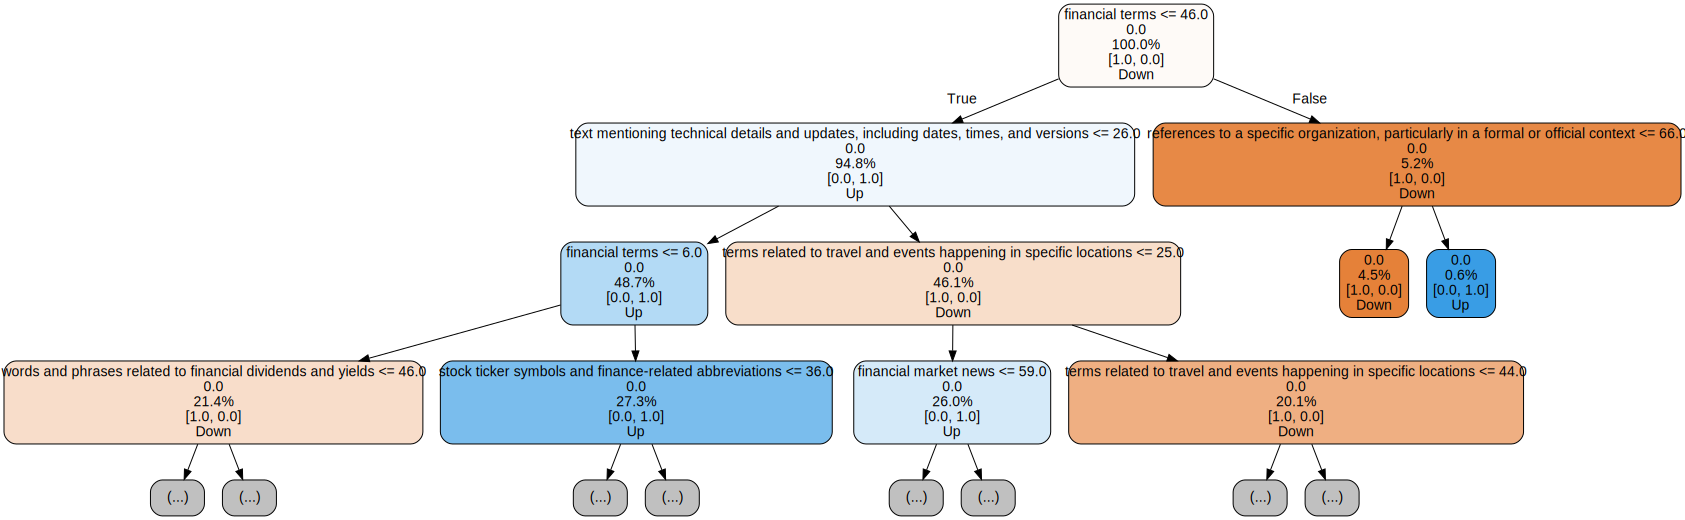

In [63]:
from sklearn.tree import export_graphviz
import graphviz

tree = clf.estimators_[0]

dot_data = export_graphviz(
    tree,
    out_file=None,
    feature_names=labeled_feature_names,
    class_names=['Down', 'Up'],
    max_depth=3,                    # smaller tree height
    proportion=True,                # compact box size
    filled=True,                   # no background color
    rounded=True,
    precision=0,                    # no decimals
    label="none",                   # show only condition/feature
    special_characters=False
)

graph = graphviz.Source(dot_data, format="png")
graph
